# HPS recognising 2 notes

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import soundfile as sf

Reinitialising the inputs to the algorithm

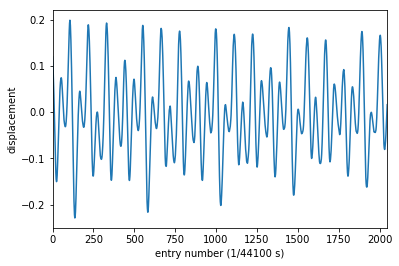

In [2]:
chunksize = 2048
notes_dict = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

note_number = 2

# read file
fileDir = os.path.dirname(os.path.realpath('__file__'))
file_name = os.path.join(fileDir, '../sounds/Audacity/D(E to B).wav')
file_name = os.path.abspath(os.path.realpath(file_name))
ref, sample_rate = sf.read(file_name)

t_start = 8.20
signal = ref[int(t_start * 44100): int(t_start * 44100 + 2050), 0]
signal_length = chunksize

signal_to_ayse = signal[:2048]

plt.plot(signal_to_ayse)
plt.xlabel("entry number (1/44100 s)")
plt.ylabel("displacement")
ax = plt.gca()
ax.set_xlim([0, 2048])
plt.show()

In [3]:
# chunksize = 2048
# notes_dict = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

# # read file
# fileDir = os.path.dirname(os.path.realpath('__file__'))
# file_name = os.path.join(fileDir, '../sounds/u c#eg#.wav')
# file_name = os.path.abspath(os.path.realpath(file_name))
# ref, sample_rate = sf.read(file_name)

# t_start = 0.0
# signal = ref[int(t_start * 44100): int(t_start * 44100 + 2050), 0]
# signal_length = chunksize

# signal_to_ayse1 = signal[:2048]

# plt.plot(signal_to_ayse1)
# plt.xlabel("entry number (1/44100 s)")
# plt.ylabel("displacement")
# ax = plt.gca()
# ax.set_xlim([0, 2048])
# plt.show()

## Taking the Discrete Fourier Transform

In [4]:
# spectrum_filter = np.absolute(np.fft.fft(signal_to_ayse1))
# a_filter=max(spectrum_filter)
# print(max(spectrum_filter))

# plt.plot(spectrum_filter, lw=0.4)
# plt.xlabel("frequency entry (44100/2048 Hz)")
# plt.ylabel("amplitude (absolute)")
# ax = plt.gca() 
# ax.set_xlim([0, 2048])
# plt.show()

[ 5.51266479  1.50805272  0.65784627 ...,  2.29432587  0.65784627
  1.50805272]


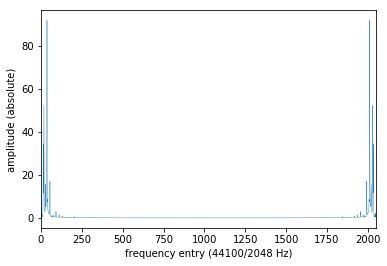

In [5]:
spectrum = np.absolute(np.fft.fft(signal_to_ayse))
# for elements in range(len(spectrum)):
#     if spectrum[elements] <= a_filter:
#         spectrum[elements] = 0
print spectrum

plt.plot(spectrum, lw=0.4)
plt.xlabel("frequency entry (44100/2048 Hz)")
plt.ylabel("amplitude (absolute)")
ax = plt.gca() 
ax.set_xlim([0, 2048])
plt.show()

????we need to keep the 0 to maintain the position which refers to the frequences,

thus when appending the elements near the local_max,need to fitler out a sequence which contains no 0

In [6]:
# non_zero=[]
# for elements in range(len(spectrum)):
#     if spectrum[elements]!=0:
#         non_zero.append(spectrum[elements])
# print non_zero
local_max=[]
for elements in range(len(spectrum)):
    local_max.append(0)
print len(spectrum)    
for elements in range(1,len(spectrum)-1):
    if spectrum[elements-1]<spectrum[elements] and spectrum[elements+1]<spectrum[elements]:
        local_max[elements]=spectrum[elements]
if spectrum[0]>spectrum[1]:
    local_max[0]=spectrum[0]

print len(local_max)

2048
2048


## Zooming into the relevant part of the spectrum
Removing the second half of the spectrum, and the lowest frequencies

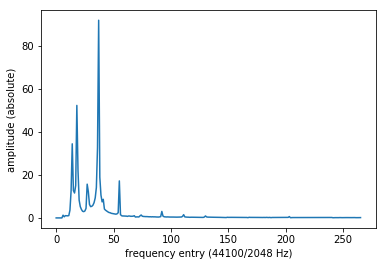

In [7]:
spectrum[:6] = 0.0  # anything below middle C is muted
spectrum[1024:] = 0.0  # mute second half of spectrum, lazy to change code

plt.plot(spectrum[:266])
plt.xlabel("frequency entry (44100/2048 Hz)")
plt.ylabel("amplitude (absolute)")
plt.show()

## Taking different scales of the spectrum
We stretch $\hat{s}[k]$ to $\hat{s}^\ast[k]$ 

$\hat{s}^\ast[k] = \hat{s}[k/6]$ for $k = 0 \enspace mod \enspace 6$

If $k$ in $\hat{s}^\ast[k]$ is not divisible by 6, we interpolate between its adjacent points.

For $k = 1 \enspace mod \enspace 6$ :<br>
$\hat{s}^\ast[k] = \frac{5}{6} \cdot \hat{s}\left[\frac{k-1}{6}\right] + \frac{1}{6} \cdot \hat{s}\left[\frac{k+5}{6}\right]$ <br> ... etc

[//]: # ($\hat{s}^\ast[k] = \frac{2}{6} \hat{s}[(k-2)/6] + \frac{2}{6} \hat{s}[(k+4)/6]$ for $k = 2\mod 6$)

[//]: # ($\hat{s}^\ast[k] = \frac{3}{6} \hat{s}[(k-3)/6] + \frac{3}{6} \hat{s}[(k+3)/6]$ for $k = 3\mod 6$)

[//]: # ($\hat{s}^\ast[k] = \frac{4}{6} \hat{s}[(k-4)/6] + \frac{4}{6} \hat{s}[(k+2)/6]$ for $k = 4\mod 6$)

[//]: # ($\hat{s}^\ast[k] = \frac{5}{6} \hat{s}[(k-5)/6] + \frac{5}{6} \hat{s}[(k+1)/6]$ for $k = 5\mod 6$)

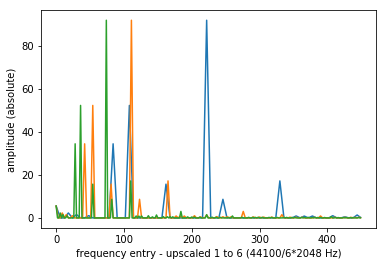

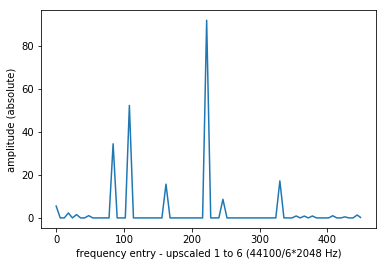

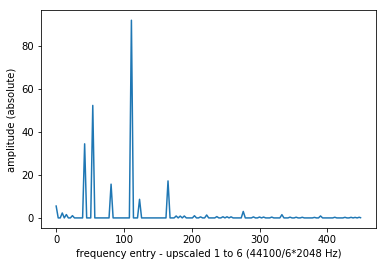

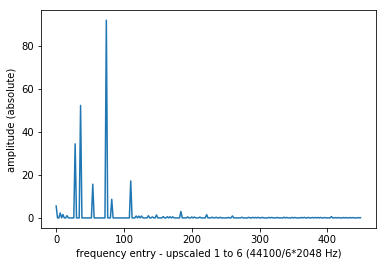

In [8]:
spectrum = local_max[:]

scale1 = [0.0] * (2048 * 6)
scale2 = [0.0] * (2048 * 6)
scale3 = [0.0] * (2048 * 6)

# upsampling the original scale spectrum, 6 for 1
scale1_f1 = np.convolve(spectrum, [5.0 / 6.0, 1.0 / 6.0])[1:]
scale1_f2 = np.convolve(spectrum, [4.0 / 6.0, 2.0 / 6.0])[1:]
scale1_f3 = np.convolve(spectrum, [3.0 / 6.0, 3.0 / 6.0])[1:]
scale1_f4 = np.convolve(spectrum, [2.0 / 6.0, 4.0 / 6.0])[1:]
scale1_f5 = np.convolve(spectrum, [1.0 / 6.0, 5.0 / 6.0])[1:]
scale1[::6] = spectrum
scale1[1::6] = scale1_f5
scale1[2::6] = scale1_f4
scale1[3::6] = scale1_f3
scale1[4::6] = scale1_f2
scale1[5::6] = scale1_f1
# downsampling from the 6 for 1 upsample
scale2[:2048 * 3] = scale1[::2]
scale3[:2048 * 2] = scale1[::3]

plt.plot(scale1[:450])
plt.plot(scale2[:450])
plt.plot(scale3[:450])
plt.xlabel("frequency entry - upscaled 1 to 6 (44100/6*2048 Hz)")
plt.ylabel("amplitude (absolute)")
plt.show()

plt.plot(scale1[:450])
plt.xlabel("frequency entry - upscaled 1 to 6 (44100/6*2048 Hz)")
plt.ylabel("amplitude (absolute)")
plt.show()

plt.plot(scale2[:450])
plt.xlabel("frequency entry - upscaled 1 to 6 (44100/6*2048 Hz)")
plt.ylabel("amplitude (absolute)")
plt.show()

plt.plot(scale3[:450])
plt.xlabel("frequency entry - upscaled 1 to 6 (44100/6*2048 Hz)")
plt.ylabel("amplitude (absolute)")
plt.show()

## Multiplying the different scales of the spectrum

In [9]:
def given_ffreq_print_note(ffreq):
    if ffreq == 0:
        return None
    notes_dict = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    note_no = -3 + (np.log2(ffreq) - np.log2(220.0)) * 12.0 # take logarithm and find note
    note_no_rounded = np.round(note_no) # round off to nearest note
    note_no_difference = note_no - note_no_rounded
    octave_no = 4 + int(note_no_rounded // 12)
    solfate_no = int(note_no_rounded) % 12
    note = str(notes_dict[solfate_no]) + str(octave_no)
    freq_difference = ffreq - 220 * 2 ** ((3 + note_no_rounded)/12)
    print ("{:.2f}Hz ({:02}) {:3s} {:+.2f} {:+.1f}Hz"
           .format(ffreq, int(note_no_rounded), note, note_no_difference, freq_difference))

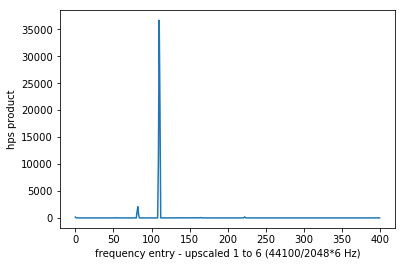

[110, 82]
394.78Hz (07) G4  +0.12 +2.8Hz
294.29Hz (02) D4  +0.04 +0.6Hz


In [10]:
hps = np.prod((scale1, scale2, scale3), axis=0)  # the "product" in harmonic product spectrum

plt.plot(hps[:400])
plt.xlabel("frequency entry - upscaled 1 to 6 (44100/2048*6 Hz)")
plt.ylabel("hps product")
plt.show()

"""
local_max1=[]
for i in xrange(1, len(hps)-1):
    if hps[i]>hps[i-1] and hps[i]>hps[i+1]:
        local_max1.append(i)
if hps[0]>hps[1]:
    local_max1.append(0)
if hps[-1]>hps[-2]:
    local_max1.append(-1)

highest_spectrum = sorted([hps[i] for i in local_max1])[-2:]

print(highest_spectrum)
"""

hpsdic = {}
for i in xrange(1, len(hps)-1):
    if hps[i]>hps[i-1] and hps[i]>hps[i+1]:
        hpsdic[hps[i]] = i
if hps[-1]>hps[-2]:
    hpsdic[hps[-1]] = -1
highest_spectrum = [hpsdic[i] for i in reversed(sorted(hpsdic.keys())[-min(note_number, len(hpsdic)):])]

print highest_spectrum

while highest_spectrum:
    ffreq = highest_spectrum.pop(0) * 44100.0 / (2048.0 * 6.0)  # sampling rate / (chunksize * upsampling value)
    #ffreq2 = highest_spectrum[1]* 44100.0 / (2048.0 * 6.0)  # sampling rate / (chunksize * upsampling value)
    given_ffreq_print_note(ffreq)

#print(given_ffreq_print_note(ffreq1))
#print(given_ffreq_print_note(ffreq2))


## Calculating the fraction of the area under graph due to the spectrum

In [11]:
# spectrum = np.array(spectrum[:int(0.5 * chunksize) + 1])  # to be plotted


# # TODO: add some weights, adapt spread based on how high ffreq is
# total_energy = np.sum(scale1)
# total_energy_due_to_ffreq = np.sum(scale1[::hps_max]) \
#                             + np.sum(scale1[1::hps_max]) + np.sum(scale1[:hps_max - 1:hps_max]) \
# #                             + np.sum(scale1[2::hps_max]) + np.sum(scale1[:hps_max - 2:hps_max]) \
# #  + np.sum(scale1[3::hps_max]) + np.sum(scale1[:hps_max - 3:hps_max]) \
# #  + np.sum(scale1[4::hps_max]) + np.sum(scale1[:hps_max - 4:hps_max]) \
# #  + np.sum(scale1[5::hps_max]) + np.sum(scale1[:hps_max - 5:hps_max]) \
# #  + np.sum(scale1[6::hps_max]) + np.sum(scale1[:hps_max - 6:hps_max])

# portion_of_energy = (total_energy_due_to_ffreq / total_energy)

# print("total: {}".format(total_energy))
# print("note: {}".format(total_energy_due_to_ffreq))
# print("fraction: {}".format(portion_of_energy))
